In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import math
from collections import defaultdict

In [4]:
class Agent:
    # Attributes
    def __init__(self, x, y, initial_wealth):
        # Coordinate of the agents
        self.x = x  
        self.y = y  
        self.wealth = initial_wealth
        self.wealth_class = self.determine_wealth_class()
    
    def determine_wealth_class(self):
        if 0 <= self.wealth <= 35:
            return "poverty"
        elif 35 < self.wealth <= 65:
            return "lower middle"
        elif 65 < self.wealth <= 100:
            return "upper middle"
        else:
            return "upper"

    """ Transaction between themselves and other agents """
    def transact(self, other):
        if self.wealth > 0:
            # exchange amount follows Normal distribution centered around $1 and variance of $0.2
            exchange_amt = min(self.wealth, round(random.gauss(1, 0.2), 2))
            self.wealth -= exchange_amt
            other.wealth += exchange_amt
        self.wealth_class = self.determine_wealth_class()
        other.wealth_class = other.determine_wealth_class()

    """get neighbours"""
    def get_neighbours(self,agents,neighbour_dist,wealth_class):
        neighbours = []
        for other in agents:
            if other != self and np.linalg.norm([other.x - self.x, other.y - self.y]) <= neighbour_dist:
            
                if self.wealth_class == "upper" and other.wealth_class == "upper":
                    neighbours.append(other)
            
                elif self.wealth_class != "upper" and other.wealth_class != "upper":
                    neighbours.append(other)
        return neighbours
    
    """ movement (in physical space, random) """
    def movement(self,new_location):
        assert len(new_location) == 2, "New location must be a tuple (x, y)"
        self.previous_location = (self.x, self.y)
        self.x, self.y = new_location

# define model class
class BoltzmannWealthModel:
    def __init__(self, width, height, num_agents, initial_wealth):
        self.width = width  
        self.height = height 
        self.agents = [Agent(random.uniform(0, width), \
            random.uniform(0, height), initial_wealth) for _ in range(num_agents)]

    def step(self,neighbourhood):
        """ model one transaction"""
        for agent in self.agents:
            # choose a neighbour randomly
            neighbours = agent.get_neighbours(self.agents,neighbourhood,agent.wealth_class)
            if neighbours:
                other = random.choice(neighbours)
                agent.transact(other)

    
    def data_collection(self):
        wealths = [agent.wealth for agent in self.agents]
        return wealths

    def visualize(self):
        """Visualization"""
        x_positions = [agent.x for agent in self.agents]
        y_positions = [agent.y for agent in self.agents]
        wealths = [agent.wealth for agent in self.agents]

        plt.figure(figsize=(5, 5))
        plt.scatter(x_positions, y_positions, c=wealths, cmap="viridis", s=50, alpha=0.6)
        plt.colorbar(label="Wealth")
        plt.title("Wealth Distribution")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.grid(True)
        plt.show()


width, height = 10, 10  
num_agents = 500  
initial_wealth = 200

model = BoltzmannWealthModel(width, height, num_agents, initial_wealth)


steps = 100
for _ in range(steps):
    model.step(1)


wealth_data = model.data_collection()

In [6]:
wealth_data

[100.34999999999998,
 49.42000000000003,
 85.13000000000001,
 103.17000000000007,
 100.16000000000003,
 71.34000000000015,
 136.11000000000004,
 101.43000000000013,
 106.63000000000005,
 103.12999999999998,
 113.15999999999998,
 94.99,
 64.79,
 88.29000000000009,
 98.34000000000005,
 123.57000000000005,
 104.9,
 180.86000000000007,
 171.38999999999996,
 102.24999999999997,
 59.68000000000006,
 105.08000000000004,
 103.79999999999998,
 102.8499999999999,
 65.55999999999997,
 107.45999999999988,
 108.79999999999998,
 81.03999999999998,
 100.82,
 78.83000000000003,
 96.72000000000001,
 55.72999999999998,
 101.55999999999993,
 72.55999999999993,
 139.43999999999988,
 107.98999999999992,
 71.30999999999992,
 102.37000000000008,
 90.88000000000005,
 117.83000000000001,
 93.14000000000004,
 109.75000000000013,
 67.52000000000002,
 103.15000000000002,
 82.50999999999996,
 48.56999999999996,
 68.63000000000002,
 49.799999999999976,
 110.86000000000001,
 100.80000000000003,
 110.82000000000002,


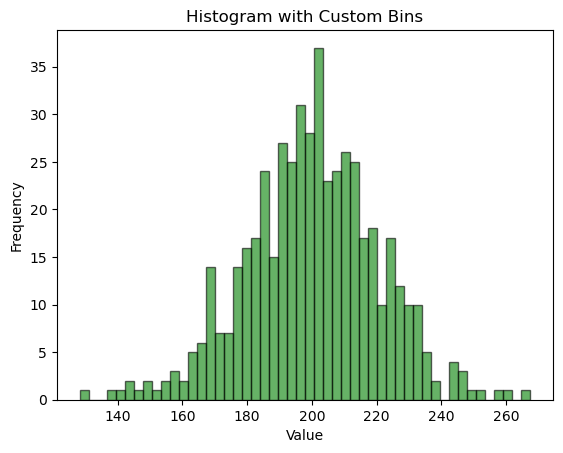

In [5]:
plt.hist(wealth_data, bins=50, color='green', edgecolor='black', alpha=0.6)
plt.title('Histogram with Custom Bins')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

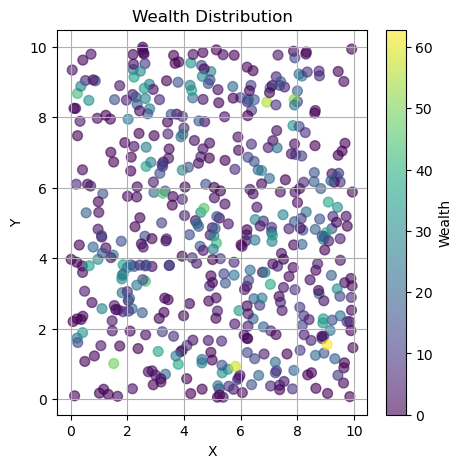

In [11]:
model.visualize()